# Computer Games Store

## Project Description and Goals

The project involves conducting a data analysis for the online store "Streamchik," which sells computer games worldwide. Historical data on game sales, user and expert ratings, genres, and platforms (such as Xbox or PlayStation) are available from open sources. The main objective is to uncover patterns that determine the success of a game. This insight will enable the store to focus on potentially popular products and plan effective advertising campaigns.

The provided dataset covers information up until the year 2016. Let's assume the current date is December 2016, and the store is planning campaigns for the year 2017.

Within the dataset, there is an abbreviation "ESRB" (Entertainment Software Rating Board) – an association that assigns age ratings to computer games. ESRB evaluates game content and assigns appropriate age categories, such as "Mature," "Early Childhood," or "Teen."

In summary, the project's main goals include analyzing historical game sales data to identify trends, patterns, and factors that contribute to a game's success. This analysis will aid in strategic decision-making, such as focusing on potential hit products and optimizing marketing strategies.



## Exploratory Data Analysis

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
import seaborn as sns

In [5]:
from scipy import stats as st 

In [6]:
data=pd.read_csv('/datasets/games.csv')

### Сonvert the column names to lowercase.

In [7]:
data.columns=data.columns.str.lower()

### Transform the data into the required type.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


 Convert the "year_of_release" column to the datetime type.

In [9]:
data['year_of_release']=data['year_of_release'].astype('Int64')

 convert the "user_score" column from object type to float

Converting to float is not working; it's giving an error. Let's check the unique values in this column

In [10]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

We've discovered the value 'tbd,' which prevents us from converting the column to the float format, performing mathematical calculations, and creating graphs. 'tbd' stands for "to be determined." Let's replace it with NaN (Not a Number).

In [11]:
data.loc[data['user_score']=='tbd'] = np.NaN

In [12]:
display(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
data['user_score']= data['user_score'].astype(float)

### Replace the missing values

In [14]:
data.isna().mean()

name               0.145139
platform           0.145019
year_of_release    0.158241
genre              0.145139
na_sales           0.145019
eu_sales           0.145019
jp_sales           0.145019
other_sales        0.145019
critic_score       0.577924
user_score         0.545917
rating             0.546814
dtype: float64

We will fill the missing ratings with the value 'not rated' to analyze the number of games without a rating.

In [15]:
data['rating'].fillna('not rated', inplace=True)

In [16]:
data.isna().mean()

name               0.145139
platform           0.145019
year_of_release    0.158241
genre              0.145139
na_sales           0.145019
eu_sales           0.145019
jp_sales           0.145019
other_sales        0.145019
critic_score       0.577924
user_score         0.545917
rating             0.000000
dtype: float64

We can observe that a significant proportion of missing values exists in the columns "critic_score," "user_score," and "rating."

We have decided to fill the missing values in the "rating" column with "not rated" since it is crucial for us to analyze whether the absence of a rating impacts future sales. In the remaining columns, we have chosen not to fill in the missing values. This is because the nature of the values in the "user_score" and "critic_score" columns is random, and filling them with calculated values might significantly distort our analysis, leading to incorrect conclusions. The data might be missing because not all users had the chance to provide ratings.

## Identifying patterns which contribute to game's success

### Calculate the total sales for all regions.

In [17]:
data['total_sales']=data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']

In [18]:
display(data.head(20))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,not rated,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,not rated,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,not rated,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,not rated,28.31


### How many games were released in different years?

In [19]:
games_each_year=data.pivot_table(index='year_of_release', values='name', aggfunc='count')

In [20]:
display(games_each_year)

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


<AxesSubplot:xlabel='year_of_release'>

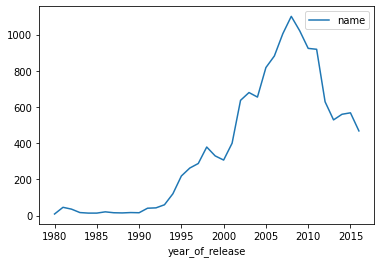

In [21]:
games_each_year.plot()

As seen from the graph, the highest number of games was released in the year 2009 - a total of 1426 games. Afterward, the number of new game releases started to decline, reaching 502 in the year 2015.

### How did sales change across different platforms?

In [22]:
sales_by_platform=data.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')

In [23]:
sales_by_platform['total']=sales_by_platform.sum(axis=1)

In [24]:
display(sales_by_platform)

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,total
platform,,,,,,,,,,,,,,,,,,,,,
2600,11.38,35.68,28.88,5.84,0.27,0.45,0.67,1.94,0.74,0.63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.48
3DO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,60.53,51.01,56.32,43.07,27.21,15.10,253.24
DC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.95
DS,NaN,NaN,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,...,102.44,84.54,61.56,13.48,10.28,0.97,NaN,NaN,NaN,655.36
GB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.43,64.97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.43
GBA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,263.70
GC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185.68
GEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.77


In [25]:
sales_by_platform_leaders=sales_by_platform.sort_values(by='total', ascending=False)

In [26]:
sales_by_platform_leaders=sales_by_platform_leaders.head(8)

In [27]:
sales_by_platform_leaders=sales_by_platform_leaders.T

In [28]:
display(sales_by_platform_leaders)

platform,PS2,X360,PS3,Wii,PS,DS,PS4,PSP
year_of_release,,,,,,,,
1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,NaN,NaN,NaN,NaN,NaN,0.02,NaN,NaN
1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's analyze the first 8 platforms with the highest total sales.

PS2, X360,PS3, PS3, Wii, DS, PS, PS4, GBA				

We will remove the years (1980-1993) during which sales were close to zero, as well as the row labeled "total," in order to create the graph.

In [29]:
sales_by_platform_leaders=sales_by_platform_leaders.drop(labels = [1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993],axis = 0)

In [30]:
sales_by_platform_leaders=sales_by_platform_leaders.drop(labels =['total'],  axis = 0)

<AxesSubplot:xlabel='year_of_release'>

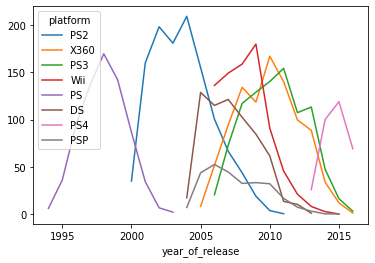

In [31]:
sales_by_platform_leaders.plot()

The graph illustrates that each platform follows a cycle that lasts approximately 10 years. No platform remains popular indefinitely. There is a period of growth, followed by a peak and eventual decline.

### Let's choose the relevant period.

Let's select the relevant period that can serve as the basis for making forecasts for the year 2017. Considering the information from the previous point, where all platforms have a lifecycle and become less relevant after a certain period, we will look at the platforms that were significant in the year 2016.


In [32]:
sales_by_platform_2016=sales_by_platform.sort_values(by=2016, ascending=False)

In [33]:
display(sales_by_platform_2016)

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,total
platform,,,,,,,,,,,,,,,,,,,,,
PS4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,25.99,100.00,118.86,69.15,314.00
XOne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.96,54.07,59.92,25.82,158.77
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,60.53,51.01,56.32,43.07,27.21,15.10,253.24
PC,NaN,NaN,NaN,NaN,NaN,0.04,NaN,NaN,0.03,NaN,...,12.26,16.33,24.13,34.55,23.22,12.38,13.25,8.49,5.22,252.25
WiiU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,17.56,21.65,22.01,16.27,4.30,81.79
PSV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.63,16.19,10.59,11.90,5.95,4.24,53.50
PS3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,117.01,128.92,140.18,154.14,107.29,113.24,47.40,16.30,3.16,921.09
X360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,134.07,118.39,166.93,140.18,99.57,88.57,33.77,11.87,1.22,948.74
2600,11.38,35.68,28.88,5.84,0.27,0.45,0.67,1.94,0.74,0.63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.48


From the table above, it's evident that the sales in 2016 were significant for the first three platforms in the list: PS4, XOne, and 3DS.
Let's take a look at which stage of their lifecycle they are at on the graph.

Let's sort the top three platforms.

In [34]:
sales_by_platform_2016_leaders=sales_by_platform_2016.head(4)

In [35]:
display(sales_by_platform_2016_leaders)

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,total
platform,,,,,,,,,,,,,,,,,,,,,
PS4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,25.99,100.00,118.86,69.15,314.00
XOne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.96,54.07,59.92,25.82,158.77
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,60.53,51.01,56.32,43.07,27.21,15.10,253.24
PC,NaN,NaN,NaN,NaN,NaN,0.04,NaN,NaN,0.03,NaN,...,12.26,16.33,24.13,34.55,23.22,12.38,13.25,8.49,5.22,252.25


Let's transpose the table to later create a graph based on years.






In [36]:
sales_by_platform_2016_leaders=sales_by_platform_2016_leaders.T

Let's filter the last 7 years.

In [37]:
sales_by_platform_2016_leaders=sales_by_platform_2016_leaders.tail(7)

In [38]:
print(sales_by_platform_2016_leaders)

platform            PS4    XOne     3DS      PC
year_of_release                                
2011                NaN     NaN   60.53   34.55
2012                NaN     NaN   51.01   23.22
2013              25.99   18.96   56.32   12.38
2014             100.00   54.07   43.07   13.25
2015             118.86   59.92   27.21    8.49
2016              69.15   25.82   15.10    5.22
total            314.00  158.77  253.24  252.25


Let's remove the "total" row to avoid distorting the graph.

In [39]:
sales_by_platform_2016_leaders=sales_by_platform_2016_leaders.drop(labels =['total'],  axis = 0)

In [40]:
display(sales_by_platform_2016_leaders)

platform,PS4,XOne,3DS,PC
year_of_release,,,,
2011,NaN,NaN,60.53,34.55
2012,NaN,NaN,51.01,23.22
2013,25.99,18.96,56.32,12.38
2014,100.00,54.07,43.07,13.25
2015,118.86,59.92,27.21,8.49
2016,69.15,25.82,15.10,5.22


<AxesSubplot:xlabel='year_of_release'>

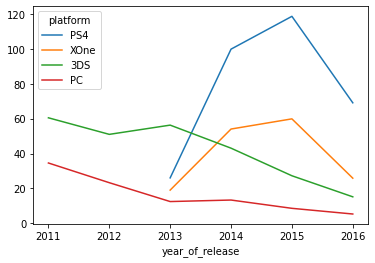

In [41]:
sales_by_platform_2016_leaders.plot()

From the graph above, we can observe that all three companies are in the declining phase of their lifecycle. The peak for 3DS was reached in 2011, while for XOne and PS4, it was in 2015, followed by a decline. The growth phase is not of interest to us as it has passed and might distort our forecast. Let's consider the period from 2015 and 2016 as our relevant timeframe, keeping in mind that data for 2016 is incomplete in many cases.

Let's remove all previous years from the table, keeping only 2016 and 2015, and continue working with this reduced dataset.

In [42]:
sales_2016_2015=data.query('year_of_release==[2016,2015]')

### Let's select a few potentially profitable platforms.

Let's group the data by platform.

In [43]:
sales_2016_2015_platforms=sales_2016_2015.pivot_table(index='platform', values='total_sales', aggfunc='sum').reset_index()

In [44]:
display(sales_2016_2015_platforms)

,platform,total_sales
0,3DS,42.31
1,PC,13.71
2,PS3,19.46
3,PS4,188.01
4,PSP,0.12
5,PSV,10.19
6,Wii,0.15
7,WiiU,20.57
8,X360,13.09
9,XOne,85.74


As we found out from the analysis above, in 2016 and 2015, there are three sales leaders: PS4, XOne, and 3DS, and all of them are in a declining phase.

### Box plot for global sales

Let's create a box plot for the top platforms from the relevant period

In [45]:
top_3_sales_2016_2015=sales_2016_2015.query('platform==["XOne","PS4","3DS"]')

In [46]:
top_3_sales_2016_2015['total_sales'].describe()

count    571.000000
mean       0.553520
std        1.239996
min        0.010000
25%        0.040000
50%        0.130000
75%        0.445000
max       14.630000
Name: total_sales, dtype: float64

<AxesSubplot:xlabel='platform', ylabel='total_sales'>

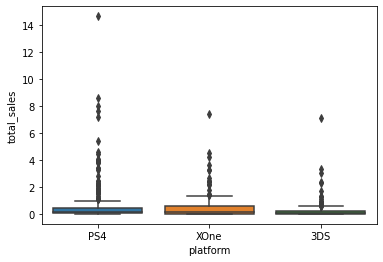

In [47]:


sns.boxplot( x=top_3_sales_2016_2015['platform'], y=top_3_sales_2016_2015['total_sales'])


Let's calibrate the Y-axis of the graph to see the main statistics of the box plot.

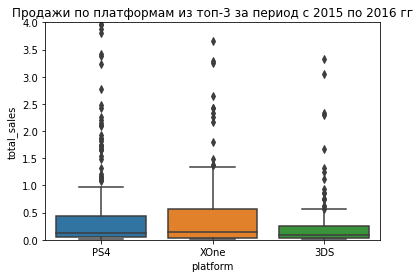

In [48]:


sns.boxplot( x=top_3_sales_2016_2015['platform'], y=top_3_sales_2016_2015['total_sales'])
plt.title(f'Продажи по платформам из топ-3 за период с 2015 по 2016 гг')
plt.ylim(0,4)
plt.show()


We constructed a box plot to assess the typical spread from the median across the top platforms. From the diagram, we observe that the median is approximately at 0.1 million copies sold, the first quartile is at 0.05 million copies sold, and the second quartile for PS4 and XOne is at 0.5 million copies sold, while for 3DS it's at 0.25 million copies sold.

The left whisker is longer and ends at the minimum, which is 0 million copies sold. The right whisker extends to -1, 1.3, and 0.7 million copies sold for PS4, XOne, and 3DS respectively. Each platform has outliers, with PS4's outlier much further away than the other platforms, around 13 million for PS4 compared to 7-8 million for the other two.

The interquartile range is from 0 to 0.5 million for PS4, 0 to 0.5 million for XOne, and 0 to 0.2 million for 3DS. This range captures 50% of the values, and within the range of the whiskers are the normal values. Beyond the whiskers lie the outliers.

In conclusion, we can deduce that the market leader, PS4, significantly outperforms its competitors.







### Correlation between sales and customer reviews.

Analyze the relationship between sales and customer and critic reviews using the example of the leading platform, PS4.

In [49]:
ps4_sales=sales_2016_2015.query('platform=="PS4"')

In [50]:
display (ps4_sales)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,not rated,14.63
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,not rated,7.98
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
...,...,...,...,...,...,...,...,...,...,...,...,...
16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,not rated,0.01
16503,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,not rated,0.01
16526,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
16530,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

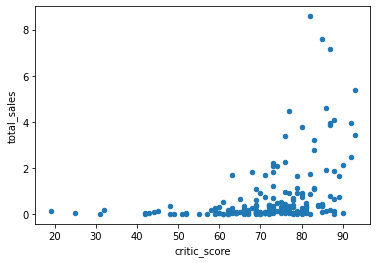

In [51]:
ps4_sales.plot(x='critic_score', y='total_sales', kind='scatter')

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

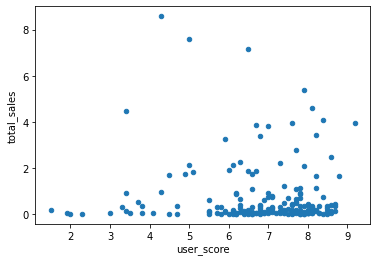

In [52]:
ps4_sales.plot(x='user_score', y='total_sales', kind='scatter')

In [53]:
ps4_sales['critic_score'].corr(ps4_sales['total_sales'])

0.3927377369694067

In [54]:
ps4_sales['user_score'].corr(ps4_sales['total_sales'])

-0.05973845712638215

The correlation between reviews and sales for PS4 is low.

### Comparative analysis with other platforms.






Let's compare the relationship between sales and reviews in PS4 with the same relationship in the other top 5 significant platforms.

In [55]:
top_five_list=['3DS', 'XOne', 'PC', 'PSV', 'WiiU']

In [56]:
top_five_data=sales_2016_2015[sales_2016_2015['platform'].isin(top_five_list)]

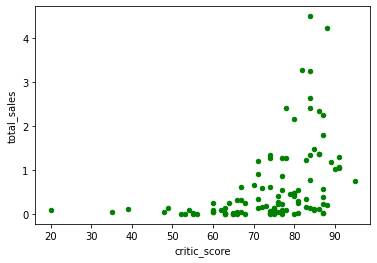

0.4250680620879304


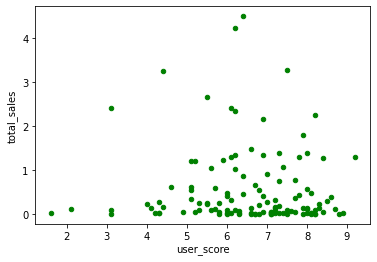

-0.04146733387366271


In [57]:
def score_corr (sales, score):
    sales.plot(x=score, y='total_sales', kind='scatter', color='g')
    plt.show()
    print(sales[score].corr(sales['total_sales']))
score_corr(top_five_data.query('platform=="XOne"'),'critic_score') 
score_corr(top_five_data.query('platform=="XOne"'),'user_score') 

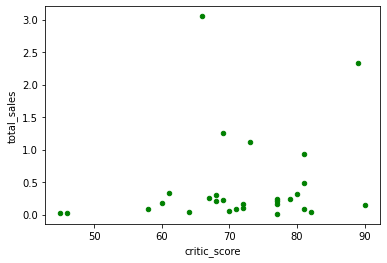

0.17757455046092874


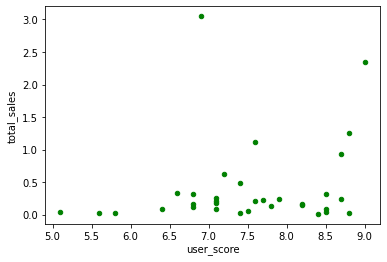

0.19879627008102982


In [58]:
def score_corr (sales, score):
    sales.plot(x=score, y='total_sales', kind='scatter', color='g')
    plt.show()
    print(sales[score].corr(sales['total_sales']))
score_corr(top_five_data.query('platform=="3DS"'),'critic_score') 
score_corr(top_five_data.query('platform=="3DS"'),'user_score') 

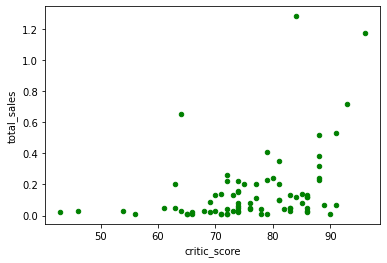

0.3773317477241351


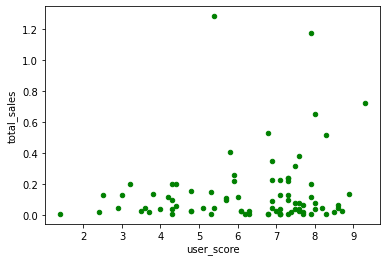

0.15038053045029076


In [59]:
def score_corr (sales, score):
    sales.plot(x=score, y='total_sales', kind='scatter', color='g')
    plt.show()
    print(sales[score].corr(sales['total_sales']))
score_corr(top_five_data.query('platform=="PC"'),'critic_score') 
score_corr(top_five_data.query('platform=="PC"'),'user_score') 

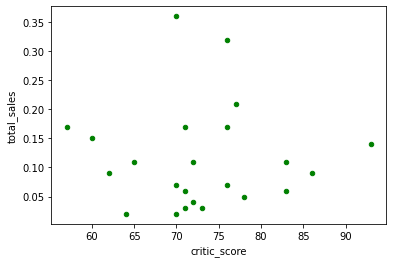

0.0027493304585274663


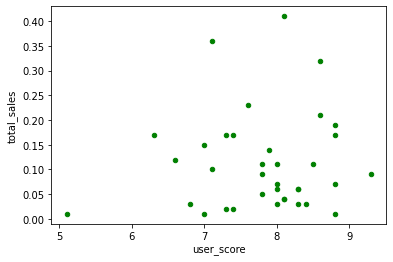

0.07833473556248864


In [60]:
def score_corr (sales, score):
    sales.plot(x=score, y='total_sales', kind='scatter', color='g')
    plt.show()
    print(sales[score].corr(sales['total_sales']))
score_corr(top_five_data.query('platform=="PSV"'),'critic_score') 
score_corr(top_five_data.query('platform=="PSV"'),'user_score') 

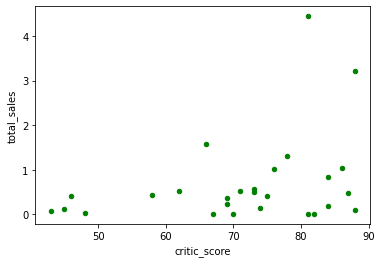

0.32567420650305284


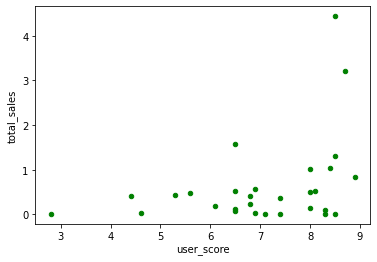

0.3635185724809445


In [61]:
def score_corr (sales, score):
    sales.plot(x=score, y='total_sales', kind='scatter', color='g')
    plt.show()
    print(sales[score].corr(sales['total_sales']))
score_corr(top_five_data.query('platform=="WiiU"'),'critic_score') 
score_corr(top_five_data.query('platform=="WiiU"'),'user_score') 

We can conclude that the correlation between ratings and sales is weak across all platforms, except for the WiiU platform, where the correlation is around 50%. Additionally, a moderate correlation between sales and critic ratings is noticeable for the XOne platform.

### Genres with the highest and lowest sales, as well as the most profitable genres.

In [62]:
games_by_genre=sales_2016_2015.groupby('genre')['name'].count()

In [63]:
display(games_by_genre)

genre
Action          400
Adventure       106
Fighting         35
Misc             59
Platform         24
Puzzle            5
Racing           41
Role-Playing    132
Shooter          77
Simulation       30
Sports           98
Strategy         29
Name: name, dtype: int64

<AxesSubplot:xlabel='genre'>

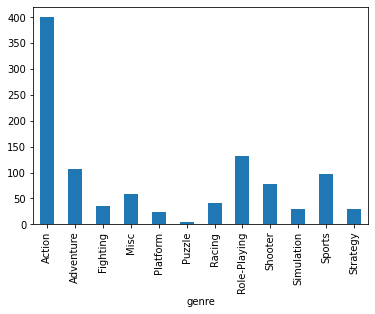

In [64]:
games_by_genre.plot(kind='bar')

In [65]:
sales_by_genre=sales_2016_2015.groupby('genre')['total_sales'].sum()

In [66]:
display(sales_by_genre)

genre
Action          100.56
Adventure        11.88
Fighting         12.29
Misc             12.60
Platform          8.85
Puzzle            0.68
Racing           10.81
Role-Playing     55.82
Shooter         105.53
Simulation        7.40
Sports           63.95
Strategy          2.98
Name: total_sales, dtype: float64

<AxesSubplot:xlabel='genre'>

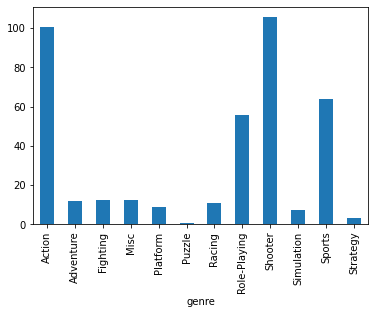

In [67]:
sales_by_genre.plot(kind='bar')

From the graphs above, it's evident that the highest number of games falls under the "Action" genre. However, the genre with the highest sales volume is "Shooter." Therefore, the "Shooter" genre can be considered the most profitable.

Let's identify the genres with the lowest sales to avoid them when formulating the strategy for the year 2017.

In [68]:
sales_by_genre=sales_by_genre.sort_values(ascending=False)
print(sales_by_genre.tail())

genre
Racing        10.81
Platform       8.85
Simulation     7.40
Strategy       2.98
Puzzle         0.68
Name: total_sales, dtype: float64


We have identified the least promising genres as "Puzzle" and "Strategy."

##  User profile for each region

### The most popular platforms (top 5).

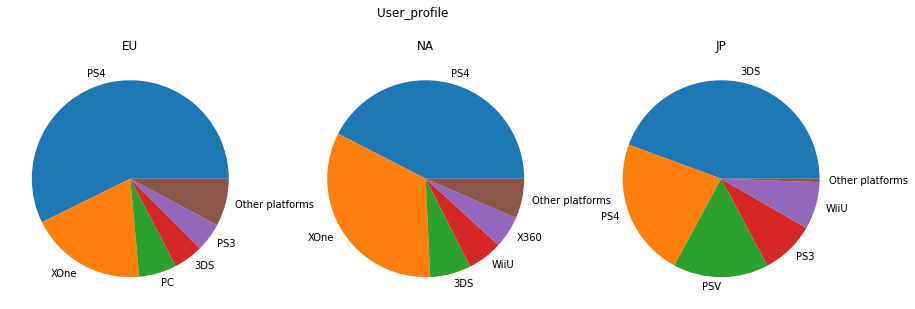

In [69]:
regions=['eu_sales', 'na_sales', 'jp_sales', 'other_sales']
fig, axs = plt.subplots(1, 3, figsize=(15, 5)) 
fig.suptitle('User_profile')
for i in range(3):
  top5_by_region = (sales_2016_2015.groupby('platform')[regions[i]].sum().reset_index().            
      sort_values(regions[i], ascending = False, ignore_index = True).head(5))              
  top5_by_region=  top5_by_region.append({'platform': 'Other platforms', regions[i]: sales_2016_2015[regions[i]].sum()- top5_by_region[regions[i]].sum()}, ignore_index= True)    
  axs[i].pie(top5_by_region[regions[i]], labels = top5_by_region['platform']) 
  axs[i].set_title(top5_by_region.columns[1].split('_')[0].upper()) 
plt.show()

In Europe, the most popular platform is PS4 with a significant lead over XOne. In the United States, PS4 is also leading, followed by XOne, but the gap between them is not as pronounced as in Europe. In Japan, a different platform, 3DS, is the leader, followed by PS4, and XOne is not represented at all.

### The most popular genres (top 5).

In [70]:
regions=['eu_sales', 'na_sales', 'jp_sales', 'other_sales', 'total_sales']

sales_by_genre=sales_2016_2015.groupby('genre')[regions].sum()
sales_by_genre_sorted=sales_by_genre.sort_values(by='total_sales', ascending=False)

top5genres_by_region=sales_by_genre_sorted.head(5)
top5genres_by_region=top5genres_by_region
display(top5genres_by_region)



,eu_sales,na_sales,jp_sales,other_sales,total_sales
genre,,,,,
Shooter,40.20,48.07,3.79,13.47,105.53
Action,34.14,33.30,22.67,10.45,100.56
Sports,27.58,26.21,1.65,8.51,63.95
Role-Playing,17.21,19.82,13.41,5.38,55.82
Misc,3.56,4.84,3.19,1.01,12.60


In [71]:
top5genres_by_region_no_total=top5genres_by_region.drop(columns='total_sales')

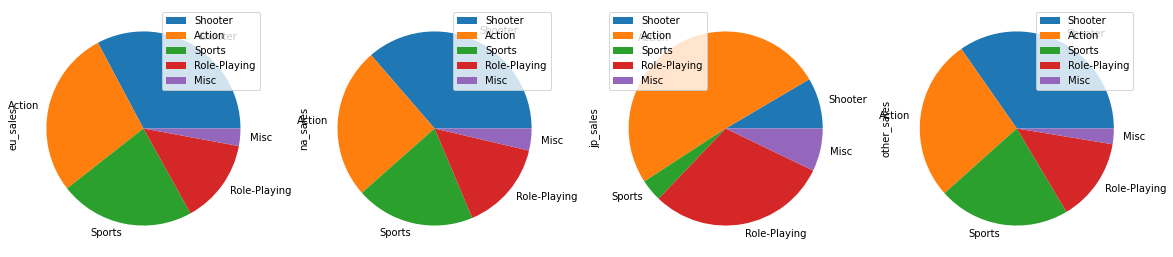

In [72]:

plot = top5genres_by_region_no_total.plot.pie(subplots=True, figsize=(20, 20))

Genre preferences are very similar between the United States and Europe (with Shooter being the most popular genre, and Action and Sports being approximately equally popular). However, in Japan, the Shooter genre ranks only third and significantly trails Action and Role-Playing genres.

### ESRB rating influence on sales in a particular region

In [73]:
sales_2016_2015['rating'].unique()

array(['not rated', 'E', 'M', 'T', 'E10+'], dtype=object)

In [74]:
sales_2016_2015['rating'].isna().mean()

0.0

In [75]:
sales_by_rating=sales_2016_2015.groupby('rating')[regions].sum()

In [76]:
display(sales_by_rating)

,eu_sales,na_sales,jp_sales,other_sales,total_sales
rating,,,,,
E,34.39,26.25,5.25,8.49,74.38
E10+,10.21,16.83,3.20,3.74,33.98
M,45.52,46.97,4.29,14.24,111.02
T,20.18,22.69,7.33,6.81,57.01
not rated,35.53,37.42,32.89,11.12,116.96


array([<AxesSubplot:ylabel='eu_sales'>, <AxesSubplot:ylabel='na_sales'>,
       <AxesSubplot:ylabel='jp_sales'>,
       <AxesSubplot:ylabel='other_sales'>,
       <AxesSubplot:ylabel='total_sales'>], dtype=object)

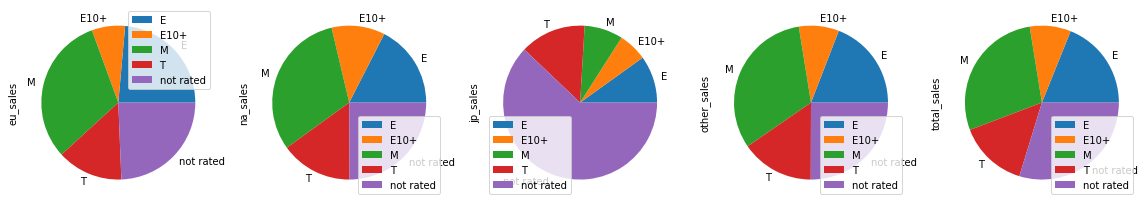

In [77]:
sales_by_rating.plot.pie(subplots=True,figsize=(20, 20) )

We can conclude that the ESRB rating does influence sales in Europe and the United States. The highest sales in the EU and NA regions are for games with an "M" (Mature) rating, around 45 million units, followed by unrated games at approximately 35 million units, and then games with "E" (Everyone) and "T" (Teen) ratings. In Japan, the situation is different. The majority of sales are for games without an age rating.

## Hypothesis testing

### The average user ratings for the Xbox One and PC platforms are the same.


We need to test the hypothesis about the equality of means of two populations. In this case, the null hypothesis is formulated as the means of the two populations being equal.

Ho: The average user ratings for the Xbox One and PC platforms are the same.

H1: The average user ratings for the Xbox One and PC platforms are different.

In [78]:
sample1_Xbox=sales_2016_2015.query('platform=="XOne" and user_score.notna()')

In [79]:
sample1 = sample1_Xbox['user_score']

In [80]:
sample2_PC=sales_2016_2015.query('platform=="PC" and user_score.notna()')

In [81]:
sample2 = sample2_PC['user_score']

To determine the value of the "equal_var" argument for the ttest_ind() function, you can calculate the variances of the samples. If the variances differ significantly, then pass the value False. If the variances are nearly the same, pass True.

In [82]:
sample1.var()

2.125792011019284

In [83]:
sample2.var()

3.110950946643718

If the variances differ by 1.5 times, then you should pass the value False to the "equal_var" argument.

In [84]:
alpha=0.05

In [85]:
results_1=st.ttest_ind(sample1, sample2, equal_var=False)


In [86]:
print("p-value:", results_1.pvalue)

p-value: 0.2946308864003345


In [100]:
if results_1.pvalue<alpha:
    print ('The hypothesis is rejected')

In [101]:
if results_1.pvalue>alpha:
    print ('The hypothesis could not be rejected.')

The hypothesis could not be rejected.


We conclude that the average user ratings for the Xbox One and PC platforms are the same

### The average user ratings for the Action and Sports genres are different.

We need to test the hypothesis about the equality of means of two populations. In such a case, the Null hypothesis is always formulated as the means of the two populations are equal.

Ho: The average user ratings of the Action and Sports genres are the same.

H1: Average user ratings for Action and Sports are different

In [89]:
sample_Action=sales_2016_2015.query('genre=="Action" and user_score.notna()')

In [90]:
sample_1 = sample_Action['user_score']

In [91]:
sample_Sports=sales_2016_2015.query('genre=="Sports"and user_score.notna()')

In [92]:
sample_2 = sample_Sports['user_score']

To determine the value of the equal_var argument of the ttest_ind() function, let's calculate the sample variances. If the variances differ greatly, then pass False.
If the variances are nearly the same, pass True.

In [93]:
sample_1.var()

1.81305591537133

In [94]:
sample_2.var()

3.8724676302318572

The variances differ by a factor of 2, so let's set the equal_var argument to False

In [95]:
alpha=0.05

In [96]:
results=st.ttest_ind(sample_1, sample_2, equal_var=False)

In [97]:
print('pvalue:',results.pvalue )

pvalue: 5.97163549920592e-10


In [98]:
if results.pvalue<alpha:
    print ('The hypothesis is rejected')

Отвергаем гипотезу


In [102]:
if results.pvalue>alpha:
    print ('The hypothesis could not be rejected')

We conclude that the average user ratings of the Action and Sports genres are different

## Conclusion

We conducted an analysis of computer game sales for the period from 1980 to 2016. We grouped the data by platforms and came to the conclusion that sales for each platform follow a cycle of around 10 years. We sorted the platforms that had sales in 2016 and determined the stage of their cycle.

By plotting a graph, we observed that all three leading companies in 2016 (PS4, XOne, and 3DS) are in the concluding phase of their cycles. The peak for 3DS was reached in 2011, while for XOne and PS4, it was in 2015, followed by a decline. We are not interested in the growth stage as it has passed and could distort our forecast. Thus, for the current period, we considered the time after the peak, which is 2016.

We created a box plot for global game sales in 2016 and concluded that the PS4 platform outperforms its competitors by a significant margin. Their sales volume was around 70 million, while the median stands around 6 million, with a characteristic range spanning from 0.5 to 16 million.

Furthermore, we analyzed the relationship between sales and reviews from critics and consumers. It turned out that the correlation between scores and sales is generally weak, except for the WiiU platform, where the correlation is about 50%. Additionally, a moderate correlation between sales and critic scores was noticed for the XOne platform.

We also analyzed the distribution of games by genre. From the graphs, it became clear that the largest number of games falls under the Action genre, while the Shooter genre accounts for the highest sales volume. Therefore, the Shooter genre can be considered the most profitable.

Next, we created user profiles for each region. It was revealed that European and American users prefer the Shooter genre, whereas in Japan, Action and Role-playing genres are dominant, with the Shooter genre being significantly less popular.

In Europe, the most popular platform is the PS4, with a substantial lead over XOne. Similarly, in the USA, the PS4 leads, followed by XOne, but the gap between them is not as significant as in Europe. In Japan, an entirely different platform, 3DS, takes the lead, followed by the PS4, and the XOne platform is not represented at all.

We also analyzed how the ESRB rating affects sales in each region. It can be concluded that the ESRB rating influences sales in Europe and the USA. The highest sales in EU and NA are associated with the "Mature" (M) rating, followed by "Teen" (T) and "Everyone" (E) ratings. In Japan, the situation is somewhat different, with the highest sales linked to the "Teen" (T) rating.

Finally, we tested two hypotheses and concluded that:

The average user ratings for the Xbox One and PC platforms are the same.

The average user ratings for the Action and Sports genres are different.




